In [1]:
import cartopy
import cartopy.crs as ccrs
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import math
import requests
import numpy as np
from datetime import datetime, timedelta
from matplotlib.animation import FuncAnimation

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env2\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
hubs = ['ALBE', 'ALDE', 'AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [3]:
def retrieve_ptdf(fromDate, toDate):
    data = {
        'fromUtc': f'{fromDate}T00:00:00.000Z',
        'toUtc': f'{toDate}T23:00:00.000Z',
    }

    try:
        response = requests.post('https://publicationtool.jao.eu/core/api/data/preFinalComputation', json=data)
        response.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
   
    return pd.DataFrame(response.json()['data'])

In [4]:
df_grid = pd.read_excel('./grid_connected.xlsx', index_col=0)
df_substations = pd.read_excel('./substations.xlsx', index_col=0)
df_powerplants = pd.read_excel('./power_plants.xlsx', index_col=0)

In [5]:
#start = datetime(2023, 4, 13).strftime('%Y-%m-%d')
#end = datetime(2023, 4, 13).strftime('%Y-%m-%d')
start = datetime(2023, 4, 13).strftime('%Y-%m-%d')
end = datetime(2023, 4, 13).strftime('%Y-%m-%d')
hour = '14:00'
zone = 'NL'

df_ptdf = retrieve_ptdf(start, end)

df_ptdf = df_ptdf.rename(columns={
    'dateTimeUtc': 'DateTime'
})
df_ptdf = df_ptdf.set_index('DateTime')
df_ptdf.index = pd.to_datetime(df_ptdf.index)
df_ptdf = df_ptdf.tz_localize(None)

df_ptdf = df_ptdf[df_ptdf.cneEic != 'NA']
df_ptdf = df_ptdf[[
    'cneEic', 'ram', 'ptdf_ALBE', 'ptdf_ALDE', 'ptdf_AT', 'ptdf_BE', 'ptdf_CZ', 'ptdf_DE', 'ptdf_FR', 'ptdf_HR', 'ptdf_HU', 'ptdf_NL', 
    'ptdf_PL', 'ptdf_RO', 'ptdf_SI', 'ptdf_SK'
]]

df_ptdf.columns = ['eic', 'ram'] + hubs
df_ptdf_hour = df_ptdf.between_time(hour,hour)
display(df_ptdf_hour)

eic     ram     ALBE     ALDE       AT  \
DateTime                                                                   
2023-04-13 14:00:00  14T-220-0-0204CA   180.0 -0.05290 -0.05362  0.00228   
2023-04-13 14:00:00  14T-220-0-00207Y   210.0  0.02470  0.02482  0.05771   
2023-04-13 14:00:00  14T-220-0-0204AE   160.0 -0.04660 -0.04723  0.03978   
2023-04-13 14:00:00  14T-220-0-0204AE   193.0 -0.06099 -0.06167  0.01748   
2023-04-13 14:00:00  10T-AT-HU-00002U   201.0  0.02917  0.02923  0.03984   
...                               ...     ...      ...      ...      ...   
2023-04-13 14:00:00  10T-CZ-SK-00002W  1018.0  0.19597  0.19893  0.13741   
2023-04-13 14:00:00  10T-CZ-SK-00002W  1101.0  0.16858  0.17113  0.12235   
2023-04-13 14:00:00  10T-CZ-SK-00002W  1060.0  0.10260  0.10448  0.06384   
2023-04-13 14:00:00  24T-V429-0000005  1618.0  0.14943  0.15218  0.10498   
2023-04-13 14:00:00  24T-V425-0000004  1446.0  0.13817  0.14046  0.10167   

                          BE       CZ    DE_LU       FR       HR       HU  \
DateTime                                                                    
2023-04-13 14:00:00 -0.05279 -0.01801 -0.05397 -0.05145 -0.00039  0.00301   
2023-04-13 14:00:00  0.02470  0.00910  0.02528  0.02449  0.00168 -0.00283   
2023-04-13 14:00:00 -0.04649 -0.01586 -0.04753 -0.04532 -0.00035  0.00265   
2023-04-13 14:00:00 -0.06090 -0.01722 -0.06222 -0.05965 -0.00160  0.00392   
2023-04-13 14:00:00  0.02917  0.02995  0.02950  0.02906  0.00942 -0.01993   
...                      ...      ...      ...      ...      ...      ...   
2023-04-13 14:00:00  0.19500  0.19537  0.19956  0.18827  0.05071  0.00631   
2023-04-13 14:00:00  0.16778  0.19205  0.17179  0.16211  0.03845 -0.00707   
2023-04-13 14:00:00  0.10199  0.10417  0.10486  0.09775  0.01514 -0.01308   
2023-04-13 14:00:00  0.14858  0.20452  0.15303  0.14249  0.00849 -0.05026   
2023-04-13 14:00:00  0.13746  0.18052  0.14118  0.13237  0.01691 -0.03774   

                          NL       PL       RO       SI       SK  
DateTime                                                          
2023-04-13 14:00:00 -0.05299 -0.02205 -0.00003 -0.00209 -0.00349  
2023-04-13 14:00:00  0.02455  0.00996 -0.00021  0.00393  0.00103  
2023-04-13 14:00:00 -0.04668 -0.01942 -0.00003 -0.00184 -0.00307  
2023-04-13 14:00:00 -0.06094 -0.02358  0.00015 -0.00451 -0.00243  
2023-04-13 14:00:00  0.02912  0.01980 -0.00129  0.01900  0.00673  
...                      ...      ...      ...      ...      ...  
2023-04-13 14:00:00  0.19952  0.31332 -0.00935  0.07915 -0.09963  
2023-04-13 14:00:00  0.17144  0.21018 -0.00661  0.06390 -0.11295  
2023-04-13 14:00:00  0.10482  0.15648 -0.00217  0.02874 -0.15045  
2023-04-13 14:00:00  0.15240  0.19500  0.00038  0.03070  0.26308  
2023-04-13 14:00:00  0.14066  0.17737 -0.00133  0.03920  0.24247  

[117 rows x 16 columns]

In [7]:
gdf_substations = gpd.GeoDataFrame(
    df_substations, geometry=gpd.points_from_xy(df_substations.lon, df_substations.lat))

for index, row in gdf_substations.iterrows():
    aggregated_capacity = df_powerplants[df_powerplants.node == index]['capacity'].agg('sum')
    gdf_substations.loc[index, 'aggregated_capacity'] = aggregated_capacity
    
for index, row in df_grid.iterrows():
    df_grid.loc[index, 'start_lon'] = df_substations.loc[row.substation_1, 'lon']
    df_grid.loc[index, 'start_lat'] = df_substations.loc[row.substation_1, 'lat']
    
    df_grid.loc[index, 'end_lon'] = df_substations.loc[row.substation_2, 'lon']
    df_grid.loc[index, 'end_lat'] = df_substations.loc[row.substation_2, 'lat']
    
# CNEs
for index, row in df_grid.iterrows():
    cne = df_ptdf_hour[df_ptdf_hour.eic == row['eic']]
    if len(cne) > 0:
        df_grid.loc[index, 'cne'] = True
        df_grid.loc[index, 'ram'] = cne.iloc[0]['ram']
        df_grid.loc[index, 'ptdf'] = cne.iloc[0][zone]
    else:
        df_grid.loc[index, 'cne'] = False
        df_grid.loc[index, 'ram'] = 0
        df_grid.loc[index, 'ptdf'] = 0
    
gdf_grid = gpd.GeoDataFrame(
    df_grid, geometry=gpd.points_from_xy(df_grid.start_lon, df_grid.start_lat), crs=4326)

for index, row in gdf_grid.iterrows():
    gdf_grid.loc[index, 'geometry'] = LineString([(row.start_lon, row.start_lat), (row.end_lon, row.end_lat)])
    
gdf_grid = gdf_grid.drop(columns=['start_lon', 'end_lon', 'start_lat', 'end_lat'])
gdf_substations = gdf_substations.drop(columns=['lon', 'lat'])

gdf_network = pd.concat([gdf_substations, gdf_grid])

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env2\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\balaz\AppData\Local\Temp\ipykernel_25708\4133046199.py:36: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  gdf_network = pd.concat([gdf_substations, gdf_grid])


In [10]:
def ptdf_colormap_today(ptdf):  # scalar value defined in 'column'
    cmap = matplotlib.cm.get_cmap('cool')
    return matplotlib.colors.to_hex(cmap((ptdf - df_ptdf_hour[zone].min())/(df_ptdf_hour[zone].max() - df_ptdf_hour[zone].min())))
   
    
style_function = lambda x: {
    "color": ptdf_colormap_today(x["properties"]["ptdf"])
    if x["properties"]["cne"] == True
    else "#999999",
    "weight": x["properties"]["ram"]/df_ptdf_hour.ram.max()*10
    if x["properties"]["cne"] == True
    else 1,
}
    
gdf_network.explore(
    style_kwds=dict(style_function=style_function)
)

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env2\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


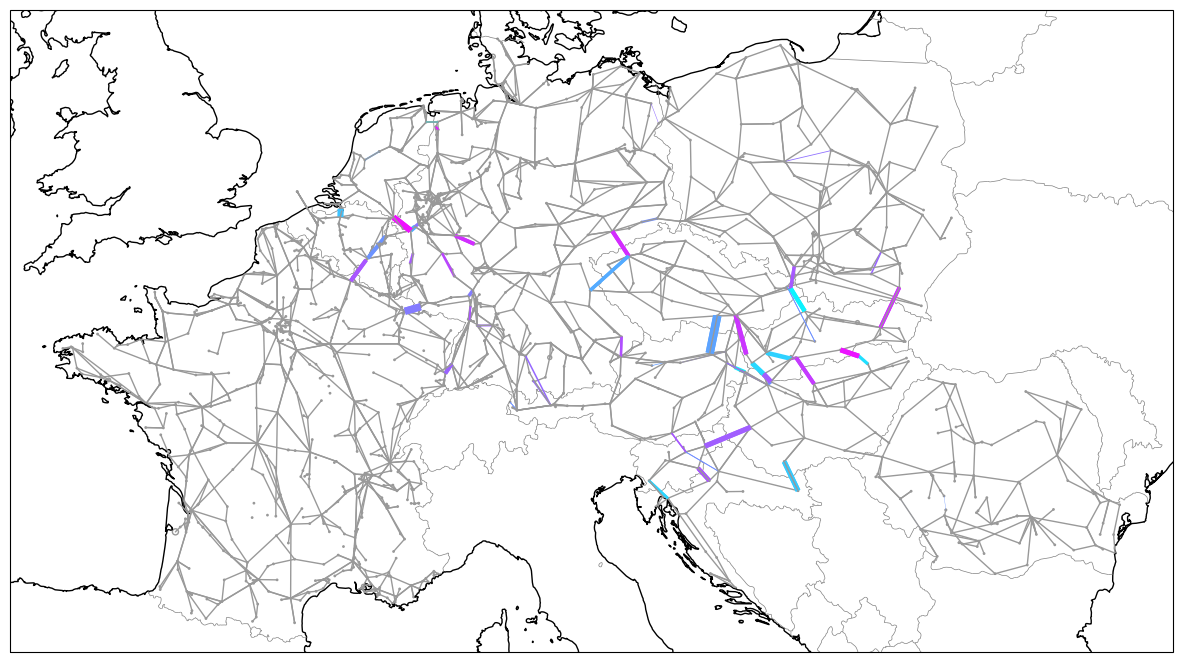

In [12]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())

def df_colormap_function(x):
    return ptdf_colormap_today(x.ptdf) if x.cne == True else "#999"

def df_linewidth_function(x):
    return (x.ram/df_ptdf_hour.ram.max()*6) if x.cne == True else 1

df_colormap = gdf_network.apply(lambda x: df_colormap_function(x), axis=1)
df_linewidth = df_grid.apply(lambda x: df_linewidth_function(x), axis=1)

gdf_network.plot(
    ax=ax,
    color=df_colormap,
    markersize=1,
    linewidth=df_linewidth
)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

In [152]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
    
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()